## Singapore Rainfall data for the location (1.30◦N,103.68◦E), collected in year 2010 from ground-based sky imager.
Exploratory analysis - Initial Ploting and Data Parsing.

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import xarray as xr
from datetime import datetime
style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (13,6) # For Increasing Size of graph

In [8]:
rainfall_df = pd.read_csv("data/imagerdata.csv", header=None, names=["day", "hour", "minute", "rainfall_rate"])
# Initial Testing for NaN values.
rainfall_df.dropna(inplace=True)
print(rainfall_df.head())

   day  hour  minute  rainfall_rate
0    1     0       0              0
1    1     0       1              0
2    1     0       2              0
3    1     0       3              0
4    1     0       4              0


In [9]:
# Parsing the Dates
rainfall_df['date']=pd.to_datetime(rainfall_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date
rainfall_df['timestamp'] = rainfall_df['date'] + pd.to_timedelta(rainfall_df['hour'].astype('str') + ':' + rainfall_df['minute'].astype('str') + ':00') # append the timedelta in hours and minutes to get the full timestamp
rainfall_df.set_index('timestamp', inplace=True)

In [32]:
# Initial Yearly Plot
# plt.plot(rainfall_df.index.values, rainfall_df['rainfall_rate'], linewidth=0.5, color='r')
# plt.title('Singapore Rainfall Rate Plot for 2010')
# plt.xlabel('Time')
# plt.ylabel('Rainfall Rate')

### Calculate the daily rainfall rate.
For this `Group-By` is to be used for grouping together based on the day for each month.

In [45]:
daily_groups = rainfall_df.groupby(rainfall_df.index.day)['rainfall_rate'].sum() # grouping based on the month and day.

Text(0, 0.5, 'Rainfall Rate')

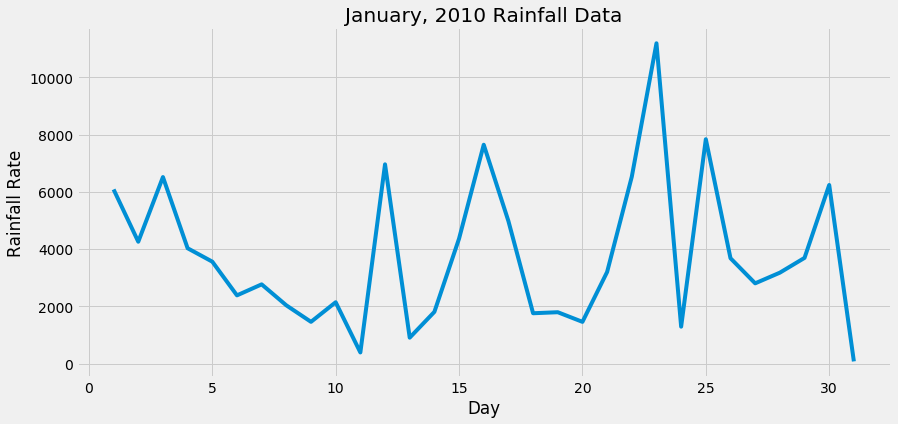

In [50]:
# For example plot the January Data
plt.title("January, 2010 Rainfall Data")
plt.plot(daily_groups)
# plt.plot(jan_gauge_df['rainfall'], label='Gauge')
plt.xlabel('Day')
plt.ylabel('Rainfall Rate')

In [13]:
daily_groups.keys()

MultiIndex([( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ( 1, 10),
            ...
            (12, 22),
            (12, 23),
            (12, 24),
            (12, 25),
            (12, 26),
            (12, 27),
            (12, 28),
            (12, 29),
            (12, 30),
            (12, 31)],
           names=['timestamp', 'timestamp'], length=365)

In [48]:
daily_groups

timestamp
1      6084
2      4260
3      6516
4      4032
5      3564
6      2388
7      2772
8      2040
9      1464
10     2148
11      396
12     6960
13      912
14     1812
15     4368
16     7644
17     4980
18     1764
19     1800
20     1464
21     3204
22     6528
23    11184
24     1296
25     7836
26     3684
27     2808
28     3180
29     3696
30     6240
31       84
Name: rainfall_rate, dtype: int64

### Precipitation Data 2010

* The dataset is in a **NetCDF** format.
* Using **xarray** package to access the data.

In [19]:
precip_dataset = xr.open_dataset('data/chirps-2010.nc') # open the dataset using xarray
precip_dataset

<xarray.Dataset>
Dimensions:    (latitude: 2000, longitude: 7200, time: 365)
Coordinates:
  * latitude   (latitude) float32 -49.975 -49.925 -49.875 ... 49.924995 49.975
  * longitude  (longitude) float32 -179.975 -179.925 ... 179.92499 179.975
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-12-31
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    creator_email:     pete@geog.ucsb.edu
    institution:       Climate Hazards Group.  University of California at Sa...
    documentation:     http://pubs.usgs.gov/ds/832/
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [22]:
precip_df = precip_dataset['precip'].sel(time=slice('2010-01-01T00:0','2010-01-31T00:0'), longitude=103.67499, latitude=1.324997).to_dataframe()

In [25]:
jan_gauge_df = pd.read_csv('data/gauge_data.csv', encoding= 'unicode_escape', header=0, usecols=[1,2,3,4], names=['year', 'month', 'day', 'rainfall'])

In [26]:
jan_gauge_df['date']=pd.to_datetime(jan_gauge_df['day'], unit='D', origin=pd.Timestamp('2009-12-31')) # Using day number to create the date

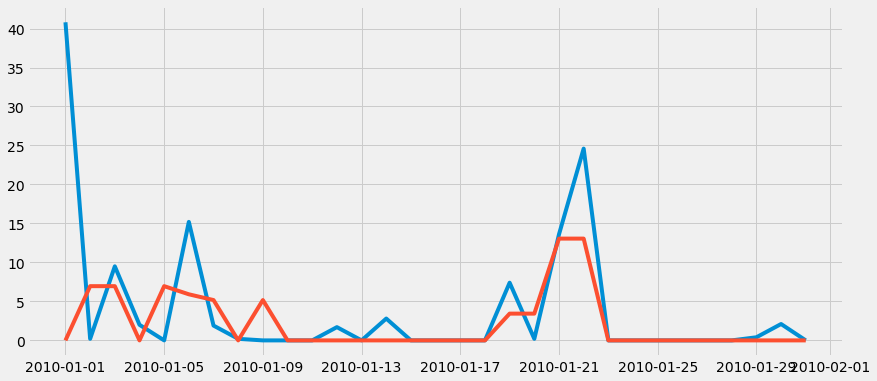

In [43]:
plt.plot(jan_gauge_df['date'],jan_gauge_df['rainfall'])
plt.plot(precip_df['precip'])